In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import *
from tabulate import tabulate
from cvxopt import matrix,solvers

In [2]:
X=pd.DataFrame({'x1':[2,-1,-1,0,1,-1,1,-1],'x2':[2,-3,2,-1,3,-2,-2,-1],'ω':[1,0,1,0,1,0,0,1]}) 
Y=X.copy()
Y.insert(2,'x3',[1,1,1,1,1,1,1,1])
Y.loc[Y['ω']==1,['x1','x2','x3']]=-1*Y.loc[Y['ω']==1]
print(Y)

   x1  x2  x3  ω
0  -2  -2  -1  1
1  -1  -3   1  0
2   1  -2  -1  1
3   0  -1   1  0
4  -1  -3  -1  1
5  -1  -2   1  0
6   1  -2   1  0
7   1   1  -1  1


In [3]:
x1=Symbol('x1')
x2=Symbol('x2')
y=np.asarray([x1,x2,1])
x1w0=X.loc[X['ω']==0,['x1']]
x2w0=X.loc[X['ω']==0,['x2']]
x1w1=X.loc[X['ω']==1,['x1']]
x2w1=X.loc[X['ω']==1,['x2']]

perceptron

In [4]:
def perceptron(a,eta,n):     
     i=0
     loop=0
     itr=0
     A=[]
     while(loop<n-1):
          yi=np.asarray(Y[['x1','x2','x3']].iloc[i])
          print("a"+str(itr)+"^Ty"+str(i),"=",a@yi.T)
          if(a@yi.T<=3.5e-18):
               a=a+eta*yi
               loop=-1
               print("a"+str(itr+1),"=","a"+str(itr),"+ y"+str(i),"=",a)
               A.append(a)
               itr=itr+1
          else:
               loop=loop+1
          i=(i+1)%n
     print("a =",a)
     return A,itr

In [5]:
def plot(A): 
     print("a0 =",np.asarray([0,0,0]),"\n")   
     for i in range(len(A)):
          print("a"+str(i+1),"=",A[i])
          if(A[i][1]!=0):
               print("Decision Boundary:",A[i]@y.T,"= 0")
               g=solve(A[i]@y.T,x2,dict=True)
               xx=np.linspace(-6,6,100)
               yy=np.asarray([lambdify(x1,g[0][x2])(val) for val in xx])
               plt.plot(xx,yy.T)
               plt.scatter(x1w0,x2w0,label="ω=0",color="green",marker=".",s=30)
               plt.scatter(x1w1,x2w1,label="ω=1",color="red",marker=".",s=30) 
               plt.xlabel('x1')
               plt.ylabel('x2')
               plt.legend()
               plt.show()
          elif(A[i][0]!=0):
               print("Decision Boundary:",A[i]@y.T,"= 0")
               g=solve(A[i]@y.T,x1,dict=True)
               plt.axvline(x=g[0][x1])
               plt.scatter(x1w0,x2w0,label="ω=0",color="green",marker=".",s=30)
               plt.scatter(x1w1,x2w1,label="ω=1",color="red",marker=".",s=30) 
               plt.xlabel('x1')
               plt.ylabel('x2')
               plt.legend()
               plt.show()
          else:
               print("")

eta=0.01

In [6]:
A,itr1=perceptron(np.array([0,0,0]),0.01,8)

a0^Ty0 = 0
a1 = a0 + y0 = [-0.02 -0.02 -0.01]
a1^Ty1 = 0.07
a1^Ty2 = 0.03
a1^Ty3 = 0.01
a1^Ty4 = 0.09
a1^Ty5 = 0.049999999999999996
a1^Ty6 = 0.01
a1^Ty7 = -0.03
a2 = a1 + y7 = [-0.01 -0.01 -0.02]
a2^Ty0 = 0.06
a2^Ty1 = 0.02
a2^Ty2 = 0.03
a2^Ty3 = -0.01
a3 = a2 + y3 = [-0.01 -0.02 -0.01]
a3^Ty4 = 0.07999999999999999
a3^Ty5 = 0.04
a3^Ty6 = 0.019999999999999997
a3^Ty7 = -0.019999999999999997
a4 = a3 + y7 = [ 0.   -0.01 -0.02]
a4^Ty0 = 0.04
a4^Ty1 = 0.009999999999999998
a4^Ty2 = 0.04
a4^Ty3 = -0.01
a5 = a4 + y3 = [ 0.   -0.02 -0.01]
a5^Ty4 = 0.06999999999999999
a5^Ty5 = 0.03
a5^Ty6 = 0.03
a5^Ty7 = -0.01
a6 = a5 + y7 = [ 0.01 -0.01 -0.02]
a6^Ty0 = 0.02
a6^Ty1 = -3.469446951953614e-18
a7 = a6 + y1 = [ 0.   -0.04 -0.01]
a7^Ty2 = 0.09
a7^Ty3 = 0.03
a7^Ty4 = 0.13
a7^Ty5 = 0.07
a7^Ty6 = 0.07
a7^Ty7 = -0.03
a8 = a7 + y7 = [ 0.01 -0.03 -0.02]
a8^Ty0 = 0.06
a8^Ty1 = 0.06
a8^Ty2 = 0.09
a8^Ty3 = 0.009999999999999998
a8^Ty4 = 0.1
a8^Ty5 = 0.029999999999999995
a8^Ty6 = 0.04999999999999999
a8^Ty7 = 3.46

a0 = [0 0 0] 

a1 = [-0.02 -0.02 -0.01]
Decision Boundary: -0.02*x1 - 0.02*x2 - 0.01 = 0


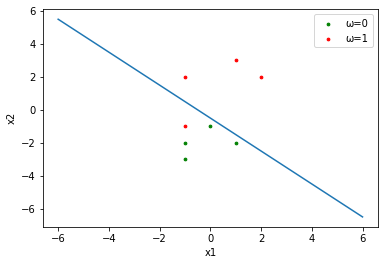

a2 = [-0.01 -0.01 -0.02]
Decision Boundary: -0.01*x1 - 0.01*x2 - 0.02 = 0


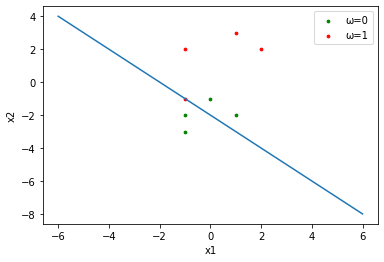

a3 = [-0.01 -0.02 -0.01]
Decision Boundary: -0.01*x1 - 0.02*x2 - 0.01 = 0


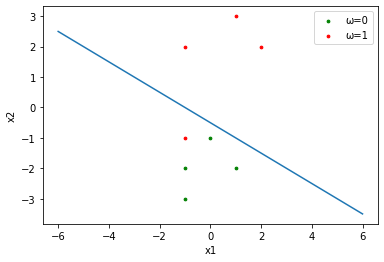

a4 = [ 0.   -0.01 -0.02]
Decision Boundary: -0.01*x2 - 0.02 = 0


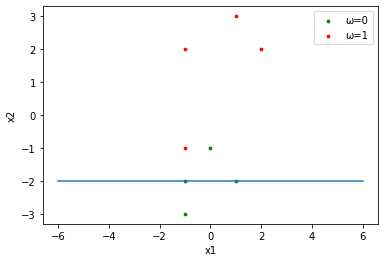

a5 = [ 0.   -0.02 -0.01]
Decision Boundary: -0.02*x2 - 0.01 = 0


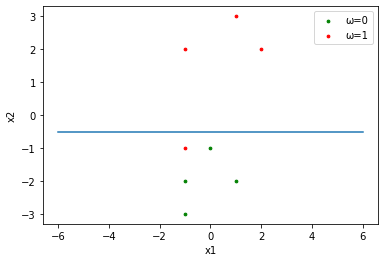

a6 = [ 0.01 -0.01 -0.02]
Decision Boundary: 0.01*x1 - 0.01*x2 - 0.02 = 0


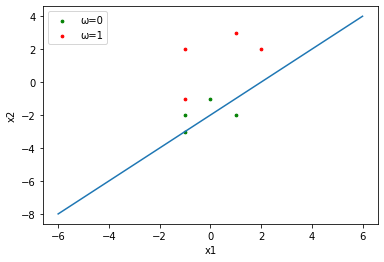

a7 = [ 0.   -0.04 -0.01]
Decision Boundary: -0.04*x2 - 0.01 = 0


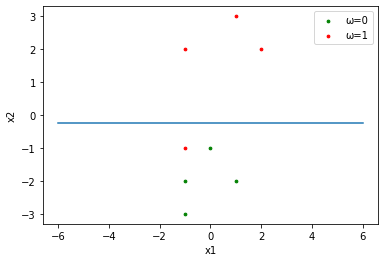

a8 = [ 0.01 -0.03 -0.02]
Decision Boundary: 0.01*x1 - 0.03*x2 - 0.02 = 0


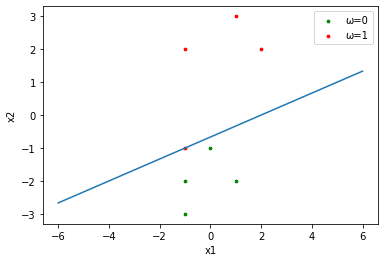

a9 = [ 0.02 -0.02 -0.03]
Decision Boundary: 0.02*x1 - 0.02*x2 - 0.03 = 0


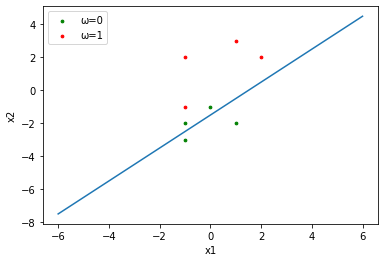

a10 = [ 0.02 -0.03 -0.02]
Decision Boundary: 0.02*x1 - 0.03*x2 - 0.02 = 0


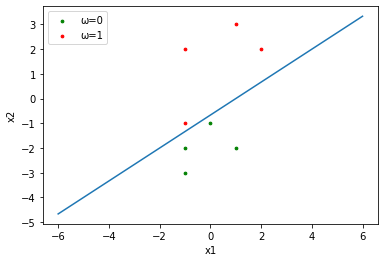

In [7]:
plot(A)

eta=0.5

In [8]:
A,itr2=perceptron(np.array([0,0,0]),0.5,8)

a0^Ty0 = 0
a1 = a0 + y0 = [-1.  -1.  -0.5]
a1^Ty1 = 3.5
a1^Ty2 = 1.5
a1^Ty3 = 0.5
a1^Ty4 = 4.5
a1^Ty5 = 2.5
a1^Ty6 = 0.5
a1^Ty7 = -1.5
a2 = a1 + y7 = [-0.5 -0.5 -1. ]
a2^Ty0 = 3.0
a2^Ty1 = 1.0
a2^Ty2 = 1.5
a2^Ty3 = -0.5
a3 = a2 + y3 = [-0.5 -1.  -0.5]
a3^Ty4 = 4.0
a3^Ty5 = 2.0
a3^Ty6 = 1.0
a3^Ty7 = -1.0
a4 = a3 + y7 = [ 0.  -0.5 -1. ]
a4^Ty0 = 2.0
a4^Ty1 = 0.5
a4^Ty2 = 2.0
a4^Ty3 = -0.5
a5 = a4 + y3 = [ 0.  -1.  -0.5]
a5^Ty4 = 3.5
a5^Ty5 = 1.5
a5^Ty6 = 1.5
a5^Ty7 = -0.5
a6 = a5 + y7 = [ 0.5 -0.5 -1. ]
a6^Ty0 = 1.0
a6^Ty1 = 0.0
a7 = a6 + y1 = [ 0.  -2.  -0.5]
a7^Ty2 = 4.5
a7^Ty3 = 1.5
a7^Ty4 = 6.5
a7^Ty5 = 3.5
a7^Ty6 = 3.5
a7^Ty7 = -1.5
a8 = a7 + y7 = [ 0.5 -1.5 -1. ]
a8^Ty0 = 3.0
a8^Ty1 = 3.0
a8^Ty2 = 4.5
a8^Ty3 = 0.5
a8^Ty4 = 5.0
a8^Ty5 = 1.5
a8^Ty6 = 2.5
a8^Ty7 = 0.0
a9 = a8 + y7 = [ 1.  -1.  -1.5]
a9^Ty0 = 1.5
a9^Ty1 = 0.5
a9^Ty2 = 4.5
a9^Ty3 = -0.5
a10 = a9 + y3 = [ 1.  -1.5 -1. ]
a10^Ty4 = 4.5
a10^Ty5 = 1.0
a10^Ty6 = 3.0
a10^Ty7 = 0.5
a10^Ty0 = 2.0
a10^Ty1 = 2.5
a10^Ty2 = 5.0
a10^

a0 = [0 0 0] 

a1 = [-1.  -1.  -0.5]
Decision Boundary: -1.0*x1 - 1.0*x2 - 0.5 = 0


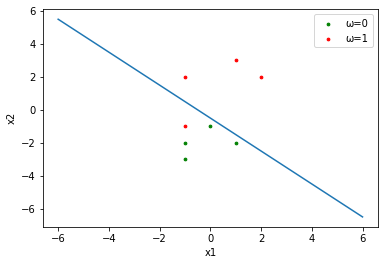

a2 = [-0.5 -0.5 -1. ]
Decision Boundary: -0.5*x1 - 0.5*x2 - 1.0 = 0


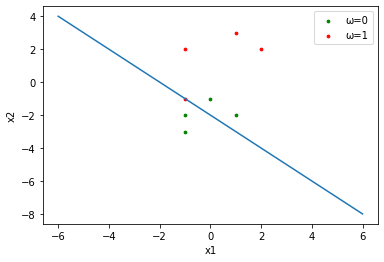

a3 = [-0.5 -1.  -0.5]
Decision Boundary: -0.5*x1 - 1.0*x2 - 0.5 = 0


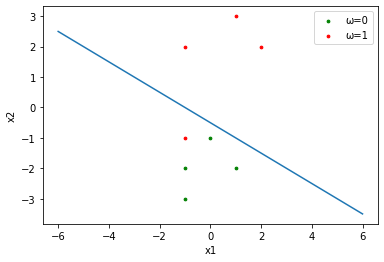

a4 = [ 0.  -0.5 -1. ]
Decision Boundary: -0.5*x2 - 1.0 = 0


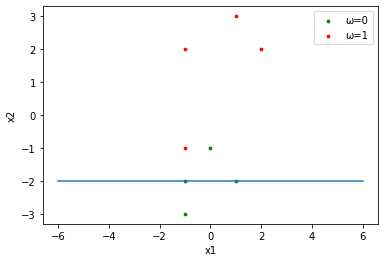

a5 = [ 0.  -1.  -0.5]
Decision Boundary: -1.0*x2 - 0.5 = 0


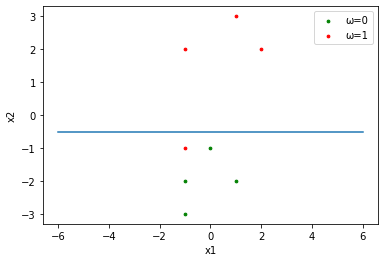

a6 = [ 0.5 -0.5 -1. ]
Decision Boundary: 0.5*x1 - 0.5*x2 - 1.0 = 0


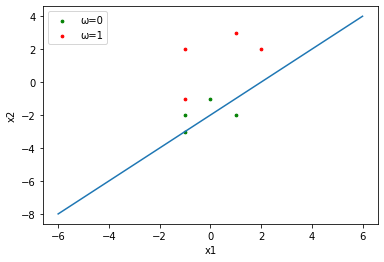

a7 = [ 0.  -2.  -0.5]
Decision Boundary: -2.0*x2 - 0.5 = 0


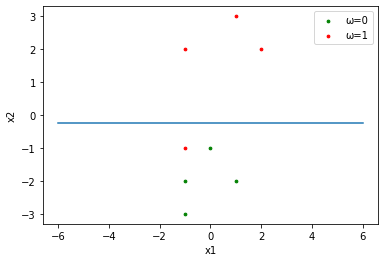

a8 = [ 0.5 -1.5 -1. ]
Decision Boundary: 0.5*x1 - 1.5*x2 - 1.0 = 0


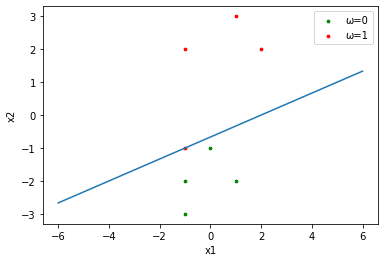

a9 = [ 1.  -1.  -1.5]
Decision Boundary: 1.0*x1 - 1.0*x2 - 1.5 = 0


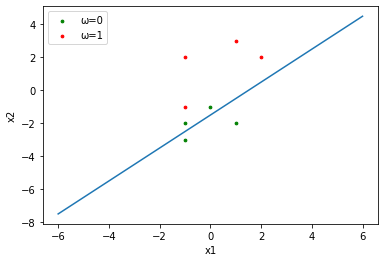

a10 = [ 1.  -1.5 -1. ]
Decision Boundary: 1.0*x1 - 1.5*x2 - 1.0 = 0


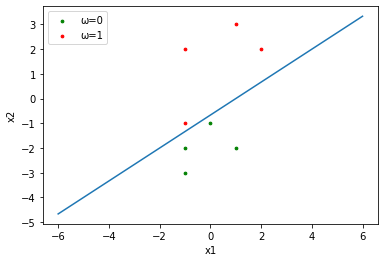

In [9]:
plot(A)

In [10]:
print(tabulate([["0.01",itr1],["0.5",itr2],],headers=["Learning rate","No. of iterations"],tablefmt="grid"))

+-----------------+---------------------+
|   Learning rate |   No. of iterations |
+=================+=====================+
|            0.01 |                  10 |
+-----------------+---------------------+
|            0.5  |                  10 |
+-----------------+---------------------+


SVM

In [11]:
n=8
X=X[['x1','x2']].to_numpy()
Y=Y[['x3']].to_numpy()
H=np.dot(Y*X,(Y*X).T)
H=H.astype('float')
q=np.repeat([-1.0],n)[..., None]
A=Y.reshape(1,-1)
A=A.astype('float')
b=0.0
G=np.negative(np.eye(n))
h=np.zeros(n)
P=matrix(H)
q=matrix(q)
G=matrix(G)
h=matrix(h)
A=matrix(A)
b=matrix(b)
sol=solvers.qp(P,q,G,h,A,b)
alpha=np.array(sol['x'])
print("alpha =",alpha)
W=np.dot((Y*alpha).T,X)[0]
print("W =",W)
S=(alpha>1e-5).flatten()
b=np.mean(Y[S]-np.dot(X[S],W.reshape(-1,1)))
print("b =",b)

     pcost       dcost       gap    pres   dres
 0: -2.2863e+00 -5.2491e+00  2e+01  3e+00  2e+00
 1: -6.6436e+00 -7.0845e+00  6e+00  1e+00  7e-01
 2: -3.2806e+00 -4.6847e+00  1e+00  1e-16  9e-15
 3: -3.9727e+00 -4.0106e+00  4e-02  9e-16  2e-15
 4: -3.9997e+00 -4.0001e+00  4e-04  9e-16  1e-15
 5: -4.0000e+00 -4.0000e+00  4e-06  9e-16  2e-15
Optimal solution found.
alpha = [[4.43207426e-01]
 [3.74398161e-07]
 [3.76252692e-08]
 [3.32962186e+00]
 [5.85800738e-08]
 [6.70376550e-01]
 [3.81290350e-07]
 [3.55679164e+00]]
W = [ 2.00000023 -2.00000031]
b = -1.0000001527507378


Decision Boundary: 2.00000022626517*x1 - 2.00000030550148*x2 - 1.00000015275074 = 0


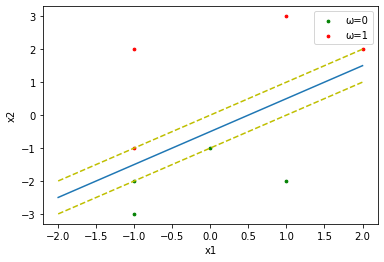

In [12]:
a=np.append(W,b)
print("Decision Boundary:",a@y.T,"= 0")
xx=np.linspace(-2,2,100)
m=-W[0]/W[1]
yy=m*xx-(b)/W[1]
margin=1/np.sqrt(np.sum(W**2))
yy_neg=yy-np.sqrt(1+m**2)*margin
yy_pos=yy+np.sqrt(1+m**2)*margin
plt.plot(xx,yy)
plt.plot(xx,yy_neg,"y--")
plt.plot(xx,yy_pos,"y--")
plt.scatter(x1w0,x2w0,label="ω=0",color="green",marker=".",s=30)
plt.scatter(x1w1,x2w1,label="ω=1",color="red",marker=".",s=30) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()